# Bare bones analysis example of trisonica mini data

1. First run to convert your bag file to an hdf5 file
`python ./bag2hdf5.py FILENAME`

2. Then run the following example

In [8]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [9]:
filename = '../sample_data/trisonica_data.hdf5'

In [10]:
df = pandas.read_hdf(filename)

In [11]:
df

,header_seq,header_stamp_secs,header_stamp_nsecs,header_frame_id,header_stamp,speed,northsouth,westeast,updown,temperature,t_secs,t_nsecs,t
0,388,1555547127,8748054,,1.555547e+09,0.0,0.14,-0.07,0.12,24.750000,1555547127,9220792,1.555547e+09
1,389,1555547127,33792018,,1.555547e+09,0.0,0.11,-0.06,0.09,24.740000,1555547127,34154619,1.555547e+09
2,390,1555547127,58765888,,1.555547e+09,0.0,0.19,-0.12,0.11,24.730000,1555547127,59117267,1.555547e+09
3,391,1555547127,83766937,,1.555547e+09,0.0,0.19,-0.09,0.10,24.770000,1555547127,84107339,1.555547e+09
4,392,1555547127,108675003,,1.555547e+09,0.0,0.16,-0.05,0.13,24.770000,1555547127,109052116,1.555547e+09
5,393,1555547127,133729934,,1.555547e+09,0.0,0.24,-0.09,0.12,24.740000,1555547127,134138597,1.555547e+09
6,394,1555547127,158755064,,1.555547e+09,0.0,0.20,-0.07,0.09,24.790001,1555547127,159123100,1.555547e+09
7,395,1555547127,183731079,,1.555547e+09,0.0,0.21,-0.08,0.12,24.770000,1555547127,184089868,1.555547e+09
8,396,1555547127,208702087,,1.555547e+09,0.0,0.20,-0.08,0.08,24.770000,1555547127,209078760,1.555547e+09
9,397,1555547127,233720064,,1.555547e+09,0.0,0.19,-0.08,0.10,24.750000,1555547127,234100904,1.555547e+09


# Plot 3D wind

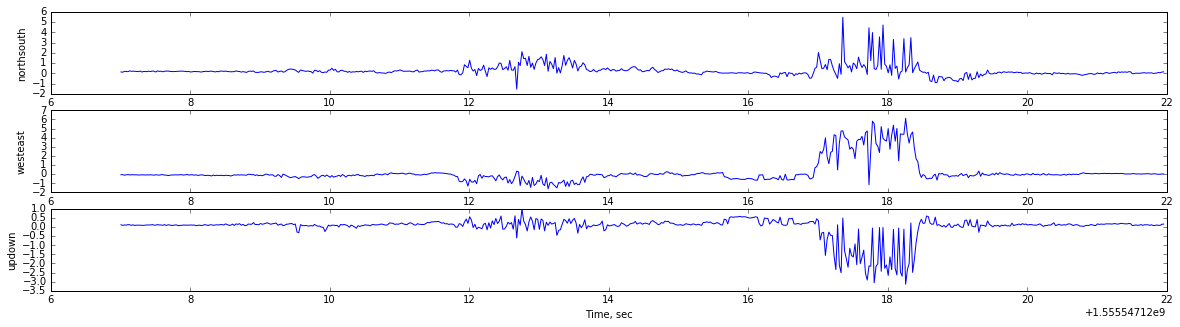

In [12]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(311)
ax1.plot(df.header_stamp, df.northsouth)
ax1.set_ylabel('northsouth')

ax2 = fig.add_subplot(312)
ax2.plot(df.header_stamp, df.westeast)
ax2.set_ylabel('westeast')

ax3 = fig.add_subplot(313)
ax3.plot(df.header_stamp, df.updown)
ax3.set_ylabel('updown')

ax3.set_xlabel('Time, sec')

# Calculate turbulent intensity
https://www.cfd-online.com/Wiki/Turbulence_intensity

In [30]:
wind_3d = np.vstack((df.northsouth.values, df.westeast.values, df.updown.values))
mean_wind_3d = np.mean(np.linalg.norm(wind_3d, axis=0))
print('Mean wind speed: ', mean_wind_3d)

('Mean wind speed: ', 0.8080854)


In [31]:
std_wind_3d = np.mean(np.linalg.norm(wind_3d, axis=1))
print('Standard Deviation of wind speeds: ', std_wind_3d)

('Standard Deviation of wind speeds: ', 19.948744)


In [32]:
turbulent_intensity = std_wind_3d / mean_3d_wind
print('Turbulent Intensity: ', turbulent_intensity)

('Turbulent Intensity: ', 24.68643)
